In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [15]:
# Load California Housing dataset
data = fetch_california_housing(as_frame=True)

X = data.data      # features
y = data.target    # house prices

print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


<Axes: >

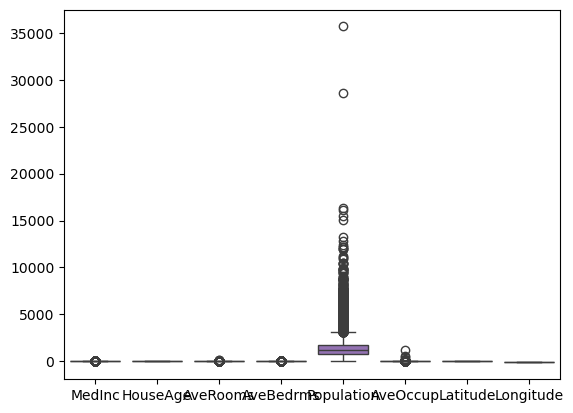

In [3]:
sns.boxplot(data=X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

rmse_raw = np.sqrt(mean_squared_error(y_test, y_pred))
r2_raw = r2_score(y_test, y_pred)

print(f"RMSE = {rmse_raw}")
print(f"R-2 = {r2_raw}")

RMSE = 0.728602202046068
R-2 = 0.5977433933712174


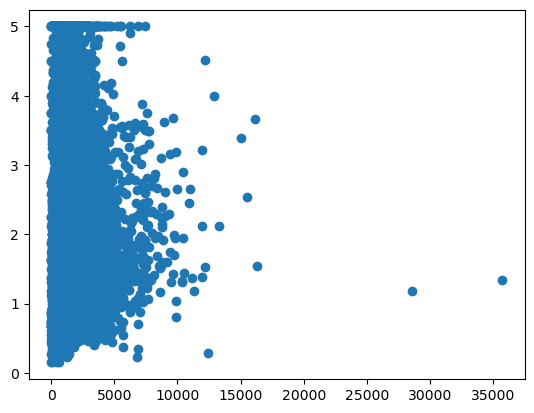

In [5]:
plt.scatter(X['Population'],y)

(array([1.2319e+04, 3.2150e+03, 6.4500e+02, 2.5800e+02, 5.7000e+01,
        1.4000e+01, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.12302526e-04, 9.52332496e-01, 1.90455269e+00, 2.85677288e+00,
        3.80899308e+00, 4.76121327e+00, 5.71343347e+00, 6.66565366e+00,
        7.61787385e+00, 8.57009405e+00, 9.52231424e+00]),
 <BarContainer object of 10 artists>)

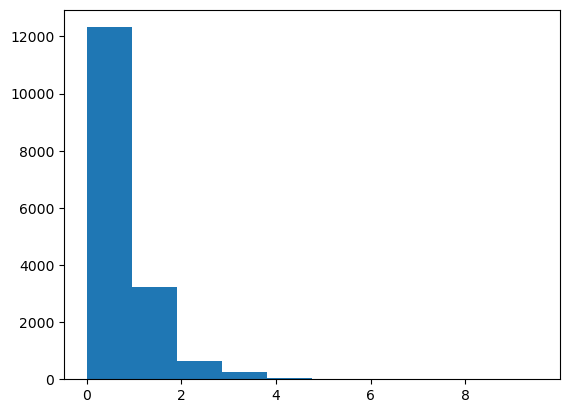

In [6]:
y_pred = lr.predict(X_train)
residuals = y_train - y_pred
z_scores = (residuals - residuals.mean()) / residuals.std()

plt.hist(np.abs(z_scores))

In [7]:
mask = np.abs(z_scores) < 3   # threshold
X_z = X_train[mask]
y_z = y_train[mask]

In [8]:
lr_z = LinearRegression()
lr_z.fit(X_z, y_z)

y_pred_z = lr_z.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_z))
r2 = r2_score(y_test, y_pred_z)

print(f"RMSE = {rmse}")
print(f"R-2 = {r2}")

RMSE = 0.7282817178690975
R-2 = 0.598097190063976


In [23]:
mask = X['Population'] < 20000   # threshold
X_r = X[mask]
y_r = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size=0.2, random_state=77)



In [24]:
lr_r = LinearRegression()
lr_r.fit(X_train, y_train)

y_pred_r = lr_r.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_r))
r2 = r2_score(y_test, y_pred_r)

print(f"RMSE = {rmse}")
print(f"R-2 = {r2}")

RMSE = 0.7316048301432371
R-2 = 0.6005325755356329


<Axes: >

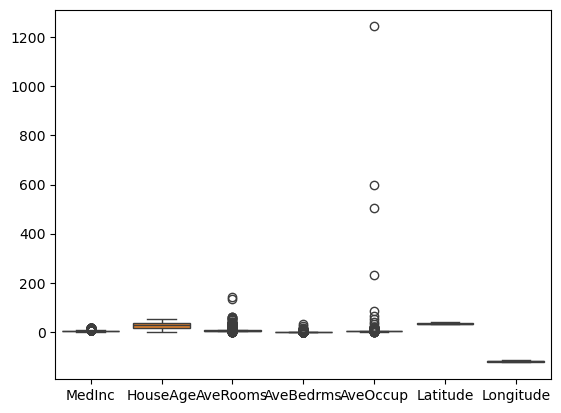

In [25]:
X_new = X.drop(columns=['Population'])
sns.boxplot(data=X_new)

In [26]:
mask = X['AveOccup'] < 400   # threshold
X_r = X[mask]
y_r = y[mask]

X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size=0.2, random_state=77)

In [27]:
lr_r = LinearRegression()
lr_r.fit(X_train, y_train)

y_pred_r = lr_r.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_r))
r2 = r2_score(y_test, y_pred_r)

print(f"RMSE = {rmse}")
print(f"R-2 = {r2}")

RMSE = 0.7178418582516984
R-2 = 0.6231663388927262
